In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyCo.Topography import read_topography
from PyCo.Topography import open_topography


from PyCo.Topography import Topography 

In [2]:
def show_topography(t):
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    plt.colorbar(ax.pcolormesh(*t.positions_and_heights(), cmap=plt.get_cmap("Greys_r")))
    ax.set_xlabel("x")
    ax.set_ylabel("y")    

# Test that the plot of x and y is ok

In [3]:
heights = np.zeros((3,3))
heights[0      ,   :  ] = 1
#       same x   all y       
t = Topography(heights, physical_sizes=(1,1))

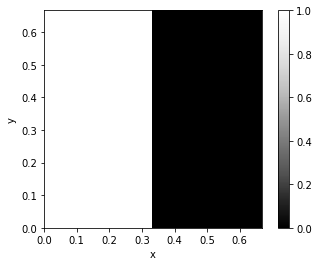

In [4]:
show_topography(t)

# DI File PyCo vs. gwyddion

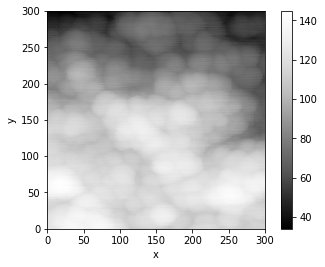

In [5]:
tdi = read_topography("../tests/file_format_examples/di2.di")
show_topography(tdi)

gwyddion

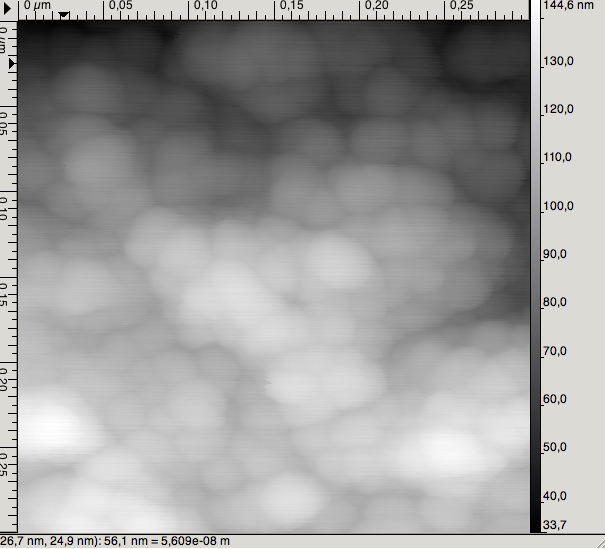

So the di reader is perfectly consistent with gwyddion and gwyddion displays the slow scan direction as x, as we do. 

#### txt version of the DI file, PyCo vs. Gwyddion

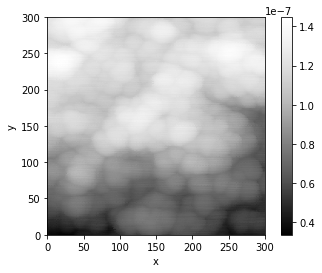

In [6]:
t = read_topography("../tests/file_format_examples/di2.txt")
t.physical_sizes = tdi.physical_sizes
show_topography(t)

The rotation of the txt reader is consistent with the di reader and gwyddion.  

### Remark: 

The y values are correctly ordered because in our plot the y axis is going up and in Gwyddion it is going down

# OPDX file 

In [7]:
r = open_topography("../tests/file_format_examples/opdx2.OPDx", )

Image
Raw


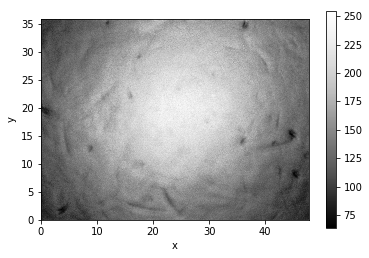

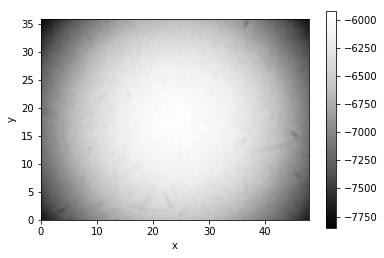

In [8]:
for c in r.channels:
    print(c.name)
    #print(c.info)
    t = c.topography()
    show_topography(t)
    t.pixel_size

the opdx reader respects the pixel size. 

In [9]:
!gwyddion ../tests/file_format_examples/opdx2.OPDx

2020-01-23 15:31:59.852 gwyddion[19775:4077987] *** WARNING: Method userSpaceScaleFactor in class NSView is deprecated on 10.7 and later. It should not be used in new applications. Use convertRectToBacking: instead. 


channel Raw

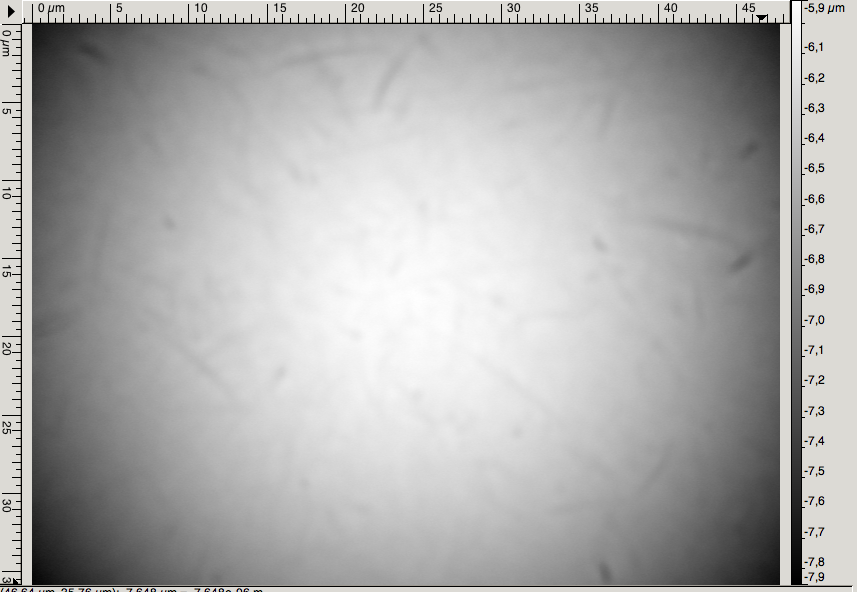

everything is ok

array([3.73593750e-08, 3.73541667e-08])

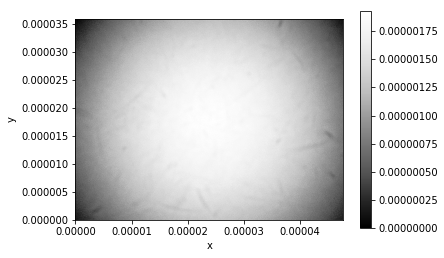

In [10]:
t = read_topography("../tests/file_format_examples/opdx2.txt")
show_topography(t)
t.pixel_size


The pixel size of the txt reader is OK and the orientation consistent with the OPDx Reader

THe heights in the txt reader are ok 

the only problem is that the width and the heights are different. In the txt reader the lateral units have been converted to µm whearas in the OPDx reader they are still micrometers.

In the opdx reader the height units are in nm, if one chooses the channel "Raw"

In [11]:
!jupyter nbconvert --to html files_xy_width_heights.ipynb

[NbConvertApp] Converting notebook files_xy_width_heights.ipynb to html
[NbConvertApp] Writing 1063768 bytes to files_xy_width_heights.html


In [12]:
!open .